# Simulation of noisy mutual inhibition
*Nhat Le, October 2017*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# Common parameters used for the entire file
param_dict_no_theta = {'Wut': 6, 'Wvt': 6, 'Wuv': 6, 'Wvu': 6,
              'theta': 0.6, 'tau': 100, 'dt': 10, 'ext': 0}

param_dict_theta = {'Wut': 6, 'Wvt': 6, 'Wuv': 6, 'Wvu': 6,
              'theta': 0.8, 'tau': 100, 'dt': 10, 'ext': 0}

state_dict = {'u': 1, 'v': 0}

In [3]:
def thresh_exp(x):
    '''Activation function'''
    return 1 / (1 + np.exp(-x))

def find_u_dot(state, params):
    '''Returns du/dt given the parameters and current state'''
    Wuv = params['Wuv']
    Wut = params['Wut']
    tau = params['tau']
    ext = params['ext']
    theta = params['theta']
    
    u = state['u']
    v = state['v']
    return (-u + thresh_exp(Wut * theta - Wuv * v + ext)) / tau

def find_v_dot(state, params):
    '''Returns dv/dt given the parameters and current state'''
    Wvu = params['Wvu']
    Wvt = params['Wvt']
    tau = params['tau']
    ext = params['ext']
    theta = params['theta']

    
    u = state['u']
    v = state['v']
    return (-v + thresh_exp(Wvt * theta - Wvu * u + ext)) / tau

def update_u_exp(state, params):
    '''Update u based on params'''
    state_new = state.copy()
    state_new['u'] += find_u_dot(state, params) * params['dt']
    return state_new

def update_v_exp(state, params):
    '''Update v based on params'''
    state_new = state.copy()
    state_new['v'] += find_v_dot(state, params) * params['dt']
    return state_new

def simulate_u_v_exp(state_init, params, niter):
    '''Simulate for niter iterations'''
    curr_state = state_init.copy()
    u_lst = [state_init['u']]
    v_lst = [state_init['v']]

    for i in range(niter):
        curr_state = update_u_exp(curr_state, params)
        u_lst.append(curr_state['u'])
        curr_state = update_v_exp(curr_state, params)
        v_lst.append(curr_state['v'])
    return u_lst, v_lst

Fixed point coordinates are:  0.279486824449 0.957834758364


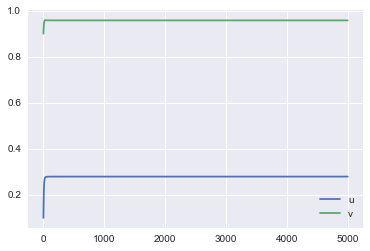

In [4]:
# Find fixed points for high theta
init_dict = {'u': 0.1, 'v': 0.9}
ulst_theta, vlst_theta = simulate_u_v_exp(init_dict, param_dict_theta, niter=5000)
plt.plot(ulst_theta, label='u')
plt.plot(vlst_theta, label='v')
plt.legend()
print('Fixed point coordinates are: ', ulst_theta[-1], vlst_theta[-1])

# Store the fixed points as dictionaries
stable1_theta = {'u': ulst_theta[-1], 'v': vlst_theta[-1]}
stable2_theta = {'v': ulst_theta[-1], 'u': vlst_theta[-1]}

Fixed point coordinates are:  0.109064286175 0.950055797413


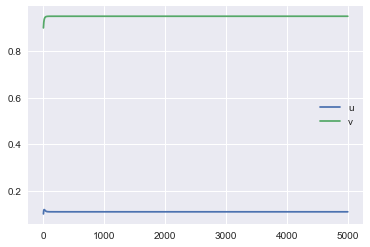

In [28]:
# Find fixed points for low theta
ulst_no_theta, vlst_no_theta = simulate_u_v_exp(init_dict, param_dict_no_theta, niter=5000)
plt.plot(ulst_no_theta, label='u')
plt.plot(vlst_no_theta, label='v')
plt.legend()
print('Fixed point coordinates are: ', ulst_no_theta[-1], vlst_no_theta[-1])

# Store the fixed points as dictionaries
stable1_no_theta = {'u': ulst_no_theta[-1], 'v': vlst_no_theta[-1]}
stable2_no_theta = {'v': ulst_no_theta[-1], 'u': vlst_no_theta[-1]}


In [29]:
def find_path_integral_line(state1, state2, params, nsteps):
    '''Perform the path integral along a straight line from 
    state1 to state2, taking n steps
    Returns the total integral, together with the cumulative list of integrals
    along the path'''
    u_ids = np.linspace(state1['u'], state2['u'], nsteps)
    v_ids = np.linspace(state1['v'], state2['v'], nsteps)
    
    # Variables for storage
    integral = 0
    integrals = [0]
    
    for i in range(nsteps - 1):
        ustart = u_ids[i]
        uend = u_ids[i + 1]
        vstart = v_ids[i]
        vend = v_ids[i + 1]
        
        start_state = {'u': ustart, 'v': vstart}
        
        udot = find_u_dot(start_state, params)
        vdot = find_v_dot(start_state, params)
        
        du = uend - ustart
        dv = vend - vstart
        
        integral -= udot * du + vdot * dv
        integrals.append(integral)
        
    return integral, np.array(integrals)
        
    

    

In [20]:
stable1arr_theta = np.array([stable1_theta['u'], stable1_theta['v']])
stable2arr_theta = np.array([stable2_theta['u'], stable2_theta['v']])
startpt_theta = stable1arr_theta + 0.1 * np.array([-1, 1])
endpt_theta = stable2arr_theta - 0.1 * np.array([-1, 1])
startpt_dict_theta = {'u': startpt_theta[0], 'v': startpt_theta[1]}
endpt_dict_theta = {'u': endpt_theta[0], 'v': endpt_theta[1]}

stable1arr_no_theta = np.array([stable1_no_theta['u'], stable1_no_theta['v']])
stable2arr_no_theta = np.array([stable2_no_theta['u'], stable2_no_theta['v']])
startpt_no_theta = stable1arr_no_theta + 0.1 * np.array([-1, 1])
endpt_no_theta = stable2arr_no_theta - 0.1 * np.array([-1, 1])
startpt_dict_no_theta = {'u': startpt_no_theta[0], 'v': startpt_no_theta[1]}
endpt_dict_no_theta = {'u': endpt_no_theta[0], 'v': endpt_no_theta[1]}

integral1, integrals1 = find_path_integral(stable1_theta, stable2_theta, param_dict_theta, 1000)
integral2, integrals2 = find_path_integral(startpt_dict_theta, endpt_dict_theta, param_dict_theta, 1000)
integral3, integrals3 = find_path_integral(stable1_no_theta, stable2_no_theta, param_dict_no_theta, 1000)
integral4, integrals4 = find_path_integral(startpt_dict_no_theta, endpt_dict_no_theta, param_dict_no_theta, 1000)


difference, _ = find_path_integral(startpt_dict_theta, startpt_dict_no_theta, param_dict_theta, 1000)

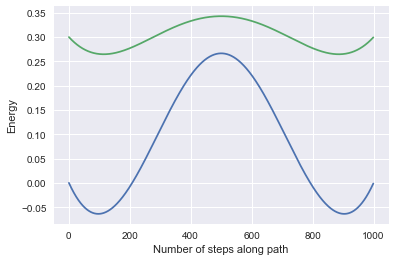

In [27]:
plt.plot(integrals4 * 1000)
plt.plot(integrals2 * 1000 + 0.3)
plt.xlabel('Number of steps along path')
plt.ylabel('Energy')


In [ ]:
ulst, vlst = simulate_u_v_exp(1, 3, c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=100, dt=10)
plt.plot(ulst, label='u')
plt.plot(vlst, label='v')
plt.legend()

In [ ]:
ustarts = np.linspace(0, 1, 11)
vstarts = np.linspace(0, 1, 11)
uends_1 = np.zeros((len(ustarts), len(vstarts)))
vends_1 = np.zeros((len(ustarts), len(vstarts)))

uends_10 = np.zeros((len(ustarts), len(vstarts)))
vends_10 = np.zeros((len(ustarts), len(vstarts)))

uends_100 = np.zeros((len(ustarts), len(vstarts)))
vends_100 = np.zeros((len(ustarts), len(vstarts)))

uends_1000 = np.zeros((len(ustarts), len(vstarts)))
vends_1000 = np.zeros((len(ustarts), len(vstarts)))

for idu, u in enumerate(ustarts):
    for idv, v in enumerate(vstarts):
        ulst, vlst = simulate_u_v_exp(u, v, c1=6, c2=6, c3=6, theta=0.5,
                                      tau=100, niter=1, dt=10)
        uends_1[idu, idv] = ulst[-1]
        vends_1[idu, idv] = vlst[-1]
        
        ulst, vlst = simulate_u_v_exp(u, v, c1=6, c2=6, c3=6, theta=0.5,
                                      tau=100, niter=10, dt=10)
        uends_10[idu, idv] = ulst[-1]
        vends_10[idu, idv] = vlst[-1]
        
        ulst, vlst = simulate_u_v_exp(u, v, c1=6, c2=6, c3=6, theta=0.5,
                                      tau=100, niter=100, dt=10)
        uends_100[idu, idv] = ulst[-1]
        vends_100[idu, idv] = vlst[-1]
        
        ulst, vlst = simulate_u_v_exp(u, v, c1=6, c2=6, c3=6, theta=0.5,
                                      tau=100, niter=1000, dt=10)
        uends_1000[idu, idv] = ulst[-1]
        vends_1000[idu, idv] = vlst[-1]

In [ ]:
x,y = np.meshgrid(range(11),range(11))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(x.ravel(), y.ravel(), uends_1.ravel())
ax.set_title('t=1')

ax = fig.add_subplot(222, projection='3d')
ax.scatter(x.ravel(), y.ravel(), uends_10.ravel())
ax.set_title('t=10')

ax = fig.add_subplot(223, projection='3d')
ax.scatter(x.ravel(), y.ravel(), uends_100.ravel())
ax.set_title('t=100')

ax = fig.add_subplot(224, projection='3d')
ax.scatter(x.ravel(), y.ravel(), uends_1000.ravel())
ax.set_title('t=1000')

In [ ]:
x,y = np.meshgrid(range(11),range(11))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(x.ravel(), y.ravel(), uends_1.ravel())
ax.set_title('t=1')

ax = fig.add_subplot(222, projection='3d')
ax.scatter(x.ravel(), y.ravel(), uends_10.ravel())
ax.set_title('t=10')

ax = fig.add_subplot(223, projection='3d')
ax.scatter(x.ravel(), y.ravel(), uends_100.ravel())
ax.set_title('t=100')

ax = fig.add_subplot(224, projection='3d')
ax.scatter(x.ravel(), y.ravel(), uends_1000.ravel())
ax.set_title('t=1000')

In [ ]:
# The effect of theta on the fixed points
ulst, vlst = simulate_u_v_exp(0.6, 0.3, c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=1000, dt=10)

ulst1, vlst1 = simulate_u_v_exp(0.6, 0.3, c1=6, c2=6, c3=6, theta=0.5,
                              tau=100, niter=1000, dt=10)
ulst2, vlst2 = simulate_u_v_exp(0.6, 0.3, c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=1000, dt=10)

ulst1b, vlst1b = simulate_u_v_exp(0.6, 0.3, c1=6, c2=6, c3=6, theta=0.5,
                              tau=100, niter=1000, dt=10)
ulst2b, vlst2b = simulate_u_v_exp(0.6, 0.3, c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=1000, dt=10)


fig,ax = plt.subplots(1, 2, figsize=(15,8))
ax[0].plot(ulst1, '--', color='blue', alpha=0.8, label='u, theta=1')
ax[0].plot(vlst1, color='blue', alpha=0.8, label='v, theta=1')
ax[0].plot(ulst2, '--', color='red', alpha=0.8, label='u, theta=0')
ax[0].plot(vlst2 , color='red', alpha=0.8, label='v, theta=0')


ax[0].set_ylim(0,1)
ax[0].legend();

ax[1].plot(ulst1b, '--', color='blue', alpha=0.8, label='u, theta=1')
ax[1].plot(vlst1b, color='blue', alpha=0.8, label='v, theta=1')
ax[1].plot(ulst2b, '--', color='red', alpha=0.8, label='u, theta=0')
ax[1].plot(vlst2b, color='red', alpha=0.8, label='v, theta=0')


ax[1].set_ylim(0,1)
ax[1].legend(loc='upper right');

## Add a 'Set' signal

In [ ]:
ulst, vlst = simulate_u_v_exp(0.6, 0.3, c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=1000, dt=10)
ulst_set, vlst_set = simulate_u_v_exp(ulst[-1], vlst[-1], c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=10, dt=10, vext=0.75)
ulst_relax, vlst_relax = simulate_u_v_exp(ulst_set[-1], vlst_set[-1], c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=10000, dt=10)
plt.plot(ulst + ulst_set + ulst_relax)
plt.plot(vlst + vlst_set + vlst_relax);


In [ ]:
ulst_set

In [ ]:
ulst, vlst = simulate_u_v_exp(0.6, 0.3, c1=6, c2=6, c3=6, theta=1,
                              tau=100, niter=1000, dt=10)
ulst_set, vlst_set = simulate_u_v_exp(ulst[-1], vlst[-1], c1=6, c2=6, c3=6, theta=1,
                              tau=100, niter=10, dt=10, vext=0.865)
ulst_relax, vlst_relax = simulate_u_v_exp(ulst_set[-1], vlst_set[-1], c1=6, c2=6, c3=6, theta=1,
                              tau=100, niter=10000, dt=10)
plt.plot(ulst + ulst_set + ulst_relax)
plt.plot(vlst + vlst_set + vlst_relax);

In [ ]:
ulst, vlst = simulate_u_v_exp(0.6, 0.3, c1=6, c2=6, c3=6, theta=1,
                              tau=100, niter=4000, dt=10)
ulst_set, vlst_set = simulate_u_v_exp(ulst[-1], vlst[-1]+0.13, c1=6, c2=6, c3=6, theta=1,
                              tau=100, niter=8000, dt=10)


In [ ]:
np.random.normal(size=10)

In [ ]:
def update_u_exp_noise(u, v, c1, c2, c3, theta, tau, dt):
    '''Update neuron u given a noise that is ~N(0, s^2)'''
    noise = np.random.normal(scale=0.01, size=len(u))
    du = (-u + thresh_exp(c3 * theta - c1 * v) + noise) / tau * dt
    return u + du

def update_v_exp_noise(u, v, c1, c2, c3, theta, tau, dt):
    '''Update neuron v given a noise that is ~N(0, s^2)'''
    noise = np.random.normal(scale=0.01, size=len(v))
    dv = (-v + thresh_exp(c3 * theta - c2 * u) + noise) / tau * dt
    return v + dv

def simulate_u_v_exp_noise(u_init, v_init, c1, c2, c3, theta, tau, niter, dt):
    u_lst = []
    v_lst = []
    u = u_init
    v = v_init
    for i in range(niter):
        u = update_u_exp_noise(u, v, c1, c2, c3, theta, tau, dt)
        #print('u = ', u)
        u_lst.append(u)
        v = update_v_exp_noise(u, v, c1, c2, c3, theta, tau, dt)
        #print('v = ', v)
        v_lst.append(v)
    return u_lst, v_lst

In [ ]:
ulst[-1]

In [ ]:
u = np.array([0.1] * 100)
v = np.array([0.3] * 100)
plt.figure(figsize=(10, 10))
ulst, vlst = simulate_u_v_exp_noise(u, v, c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=5000, dt=10)
ulst_set, vlst_set = simulate_u_v_exp_noise(ulst[-1]+0.2, vlst[-1], c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=5000, dt=10)


U = np.vstack(ulst + ulst_set)
plt.plot(U, 'blue', alpha=0.05, label='u');

V = np.vstack(vlst + vlst_set)
plt.plot(V, 'red', alpha=0.05, label='v');
plt.xlabel('Time')
plt.ylabel('Activity')
plt.title('Theta = 0')

#plt.legend();

In [ ]:
U.shape

In [ ]:
u = np.array([0.1] * 100)
v = np.array([0.3] * 100)
plt.figure(figsize=(10, 10))
ulst, vlst = simulate_u_v_exp(u, v, c1=6, c2=6, c3=6, theta=1.2,
                              tau=100, niter=5000, dt=10)
ulst_set, vlst_set = simulate_u_v_exp(ulst[-1]+0.2, vlst[-1], c1=6, c2=6, c3=6, theta=1.2,
                              tau=100, niter=5000, dt=10)


U = np.vstack(ulst + ulst_set)
plt.plot(U[2000:, :], 'blue', alpha=0.05, label='u');

V = np.vstack(vlst + vlst_set)
plt.plot(V[2000:, :], 'red', alpha=0.05, label='v');
#plt.ylim(0.9, 1.2)
#plt.legend();

In [ ]:
plt.plot(U, 'blue');

In [ ]:
def compute_path_integral(start_pt, end_pt):
    